# preparation

as this study is based on various datasets, the step of creating dataset is kind of complicated, the steps will be explained with following examples

In [17]:
import sys
sys.path.append('./dataprocesser')
sys.path.append('./synthrad_conversion')
from dataprocesser import step2_create_segmentation as createseg
from dataprocesser import step1_init_data_list as init_data_list

## prepare a visualization function

In [76]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
def sample_med_seg(mr_images, mr_segs, mr_seg_tissues, volume_index=0, slice_index = 50, cmap='jet',hist_bins=200):
    example_mr = mr_images[volume_index]
    example_mr_seg = mr_segs[volume_index]
    example_mr_seg_tissue = mr_seg_tissues[volume_index]
    print('show sample: ', example_mr)
    img = nib.load(example_mr)
    seg = nib.load(example_mr_seg)
    seg_tissue = nib.load(example_mr_seg_tissue)
    
    example_slice_img = np.rot90(img.get_fdata()[:,:,slice_index])
    example_slice_seg = np.rot90(seg.get_fdata()[:,:,slice_index])
    example_slice_seg_tissue = np.rot90(seg_tissue.get_fdata()[:,:,slice_index])

    '''
    img = nib.as_closest_canonical(img)
    seg = nib.as_closest_canonical(seg)
    seg_tissue = nib.as_closest_canonical(seg_tissue)

    example_slice_img = img.get_fdata()[:,:,slice_index]
    example_slice_seg = seg.get_fdata()[:,:,slice_index]
    example_slice_seg_tissue = seg_tissue.get_fdata()[:,:,slice_index]
    '''
    header = img.header
    print("Data distribution range:", np.min(img.get_fdata()), np.max(img.get_fdata()))
    print("Shape:", img.shape)                        # 图像维度
    print("Voxel spacing:", header.get_zooms())       # 体素大小 (spacing)
    print("Affine matrix:", img.affine)               # 仿射矩阵（方向+原点）

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.hist(example_slice_img.flatten(), bins=hist_bins, color='steelblue', alpha=0.8)
    plt.title("Image Pixel Value Distribution")
    plt.subplot(1, 3, 2)
    plt.imshow(example_slice_img, cmap='gray', origin='lower')  
    plt.title("Image Slice")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(example_slice_img, cmap='gray', origin='lower')
    plt.imshow(example_slice_seg, cmap=cmap, alpha=0.4, origin='lower')
    plt.imshow(example_slice_seg_tissue, cmap=cmap, alpha=0.4, origin='lower')
    plt.title("Image + Segmentation")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

def printlist(ct_images, ct_patient_IDs, list_example_idx):
    '''for image, pID in zip(ct_images[:list_example_idx], ct_patient_IDs[:list_example_idx]):
        print(image, pID, '\n')'''
    print(ct_images[list_example_idx], ct_patient_IDs[list_example_idx], '\n')

## view registred datasets


In [19]:
from dataprocesser import DATASET_REGISTRY
for element in DATASET_REGISTRY:
    print(element)

anish
anish_seg
combined_simplified_csv_seg_assigned
combined_simplified_csv_seg_without_assigned_loader
combined_simplified_csv_seg_mr_loader
mr2ct_simplified_csv
xcat_ct_simplified_csv
synthetic_ct_simplified_csv
synthrad_mr2ct
synthrad_seg
combined
combined_assigned
csv_slice
csv_slice_assigned
json_slice


# check datsets

## synthRAD dataset
for better organizing, we should load our data in form of imagepath + pID

In [78]:

from dataprocesser import dataset_synthrad

dir = r'E:\Projects\yang_proj\data\synthrad\Task1\pelvis'

synthrad_ct_images, synthrad_ct_patient_IDs =  dataset_synthrad.list_img_pID_from_synthrad_folder(dir, accepted_modalities = ["ct"], saved_name=None)
synthrad_ct_segs, _ =  dataset_synthrad.list_img_pID_from_synthrad_folder(dir, accepted_modalities = ["ct_seg"], saved_name=None)
synthrad_ct_seg_tissues, _ =  dataset_synthrad.list_img_pID_from_synthrad_folder(dir, accepted_modalities = ["ct_seg_tissue"], saved_name=None)

synthrad_mr_images, synthrad_mr_patient_IDs =  dataset_synthrad.list_img_pID_from_synthrad_folder(dir, accepted_modalities = ["mr"], saved_name=None)
synthrad_mr_segs, _ =  dataset_synthrad.list_img_pID_from_synthrad_folder(dir, accepted_modalities = ["mr_seg"], saved_name=None)
synthrad_mr_seg_tissues, _ =  dataset_synthrad.list_img_pID_from_synthrad_folder(dir, accepted_modalities = ["mr_seg_tissue"], saved_name=None)

volume_id = 0
printlist(synthrad_ct_images, synthrad_ct_patient_IDs, volume_id)
printlist(synthrad_mr_images, synthrad_mr_patient_IDs, volume_id)

def seperate_synthrad_mr_A_C(list):
    list_A = []
    list_C = []
    for item in list:
        if 'PA' in item:
            list_A.append(item)
        elif 'PC' in item:
            list_C.append(item)
    print(len(list_A), len(list_C))
    return list_A, list_C

synthrad_T1_mr_images, synthrad_T2_mr_images = seperate_synthrad_mr_A_C(synthrad_mr_images)
synthrad_T1_mr_segs, synthrad_T2_mr_segs = seperate_synthrad_mr_A_C(synthrad_mr_segs)
synthrad_T1_mr_seg_tissues, synthrad_T2_mr_seg_tissues = seperate_synthrad_mr_A_C(synthrad_mr_seg_tissues)
synthrad_T1_mr_patient_IDs, synthrad_T2_mr_patient_IDs = seperate_synthrad_mr_A_C(synthrad_mr_patient_IDs)



Found 180 ['ct'] files in E:\Projects\yang_proj\data\synthrad\Task1\pelvis 

Found 180 ['ct_seg'] files in E:\Projects\yang_proj\data\synthrad\Task1\pelvis 

Found 180 ['ct_seg_tissue'] files in E:\Projects\yang_proj\data\synthrad\Task1\pelvis 

Found 180 ['mr'] files in E:\Projects\yang_proj\data\synthrad\Task1\pelvis 

Found 180 ['mr_seg'] files in E:\Projects\yang_proj\data\synthrad\Task1\pelvis 

Found 180 ['mr_seg_tissue'] files in E:\Projects\yang_proj\data\synthrad\Task1\pelvis 

E:\Projects\yang_proj\data\synthrad\Task1\pelvis\1PA001\ct.nii.gz 1PA001 

E:\Projects\yang_proj\data\synthrad\Task1\pelvis\1PA001\mr.nii.gz 1PA001 

120 60
120 60
120 60
120 60


avaiable CMAP

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

show sample:  E:\Projects\yang_proj\data\synthrad\Task1\pelvis\1PA001\ct.nii.gz
Data distribution range: -1024.0 1478.0
Shape: (565, 338, 146)
Voxel spacing: (1.0, 1.0, 2.5)
Affine matrix: [[  -1.            0.            0.          293.24899292]
 [   0.           -1.            0.          121.20001221]
 [   0.            0.            2.5        -180.        ]
 [   0.            0.            0.            1.        ]]


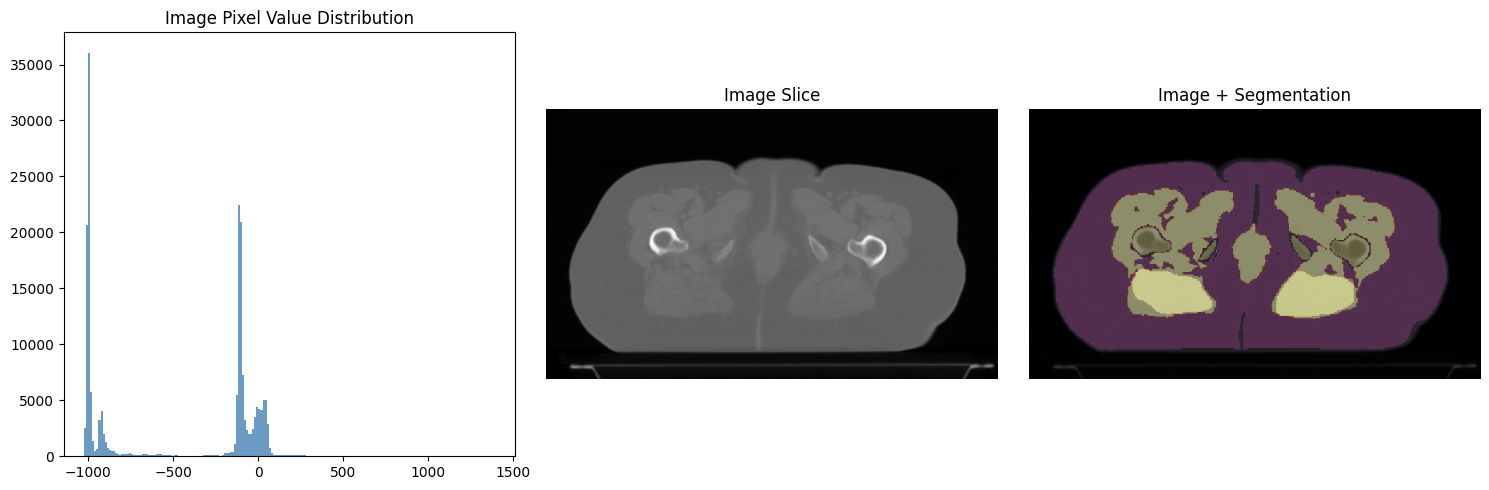

show sample:  E:\Projects\yang_proj\data\synthrad\Task1\pelvis\1PA001\mr.nii.gz
Data distribution range: 0.0 564.5497436523438
Shape: (565, 338, 146)
Voxel spacing: (1.0, 1.0, 2.5)
Affine matrix: [[  -1.            0.            0.          293.24899292]
 [   0.           -1.            0.          121.20001221]
 [   0.            0.            2.5        -180.        ]
 [   0.            0.            0.            1.        ]]


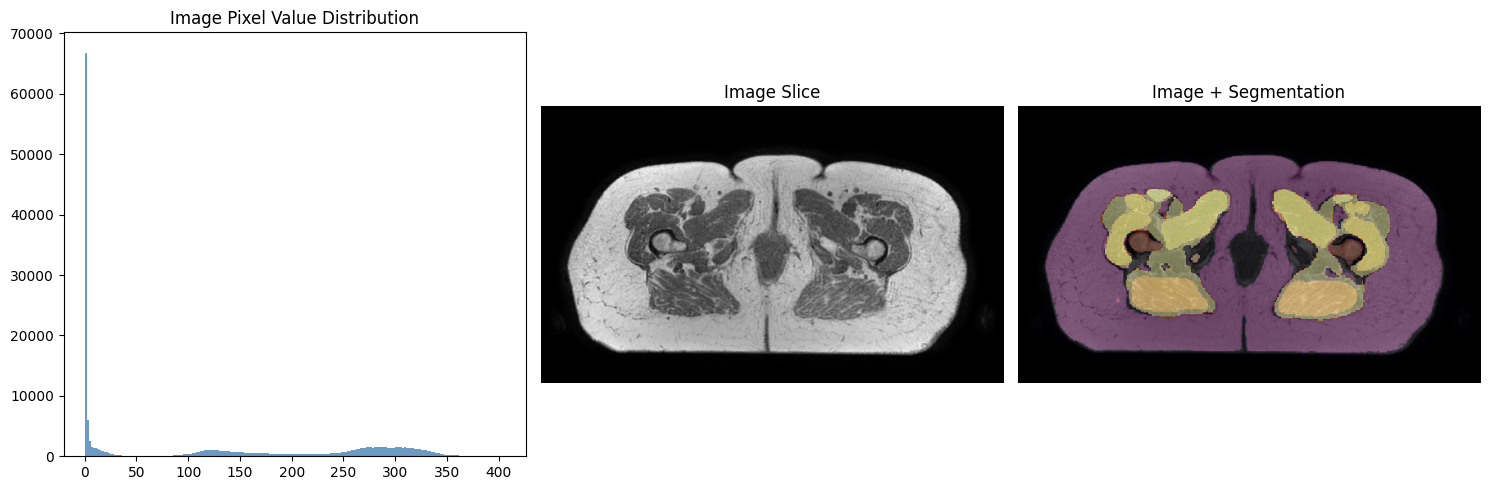

show sample:  E:\Projects\yang_proj\data\synthrad\Task1\pelvis\1PC000\mr.nii.gz
Data distribution range: 0.0 283.0
Shape: (458, 333, 86)
Voxel spacing: (1.0, 1.0, 2.5)
Affine matrix: [[ -1.          0.          0.        237.       ]
 [  0.         -1.          0.        120.3999939]
 [  0.          0.          2.5       152.5      ]
 [  0.          0.          0.          1.       ]]


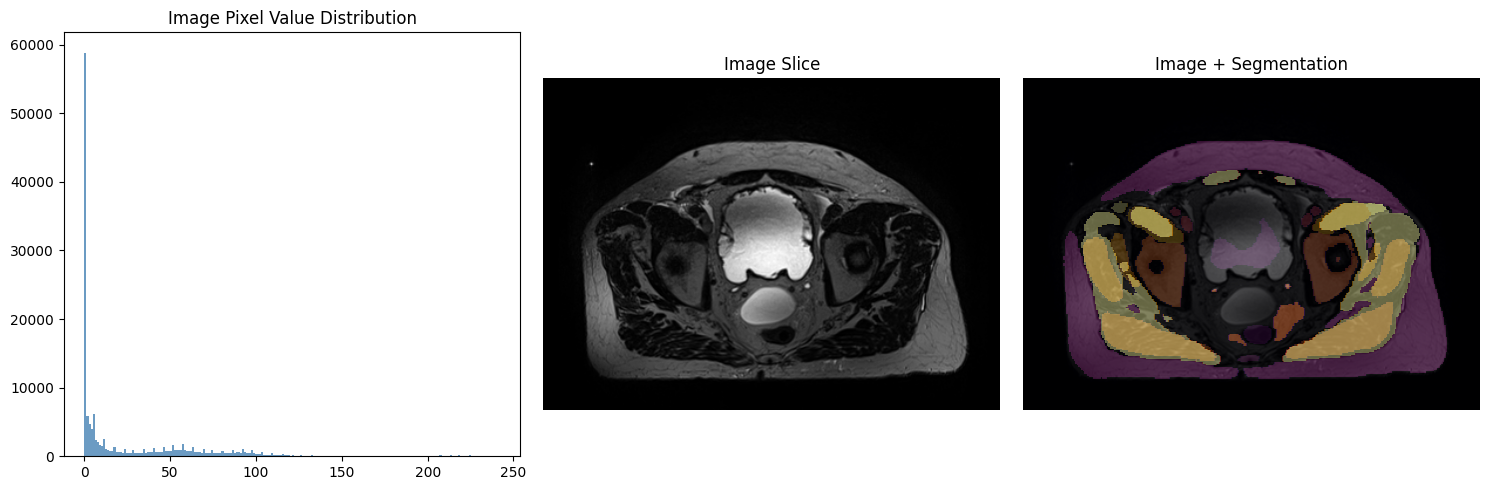

In [79]:
cmap = 'inferno'
sample_med_seg(synthrad_ct_images, synthrad_ct_segs, synthrad_ct_seg_tissues, volume_index=0, slice_index = 50, cmap=cmap)
sample_med_seg(synthrad_T1_mr_images, synthrad_T1_mr_segs, synthrad_T1_mr_seg_tissues, volume_index=0, slice_index = 50, cmap=cmap)
sample_med_seg(synthrad_T2_mr_images, synthrad_T2_mr_segs, synthrad_T2_mr_seg_tissues, volume_index=0, slice_index = 50, cmap=cmap)


## monai internal dataset (Dr. Anika Schrittmatter)

In [80]:
from dataprocesser.dataset_anika import all_list_single_modality_from_anika_dataset_include_duplicate, extract_patientID_from_Anika_dataset
dataset2_ct_path = r'E:\Projects\yang_proj\data\anika\CT'
dataset2_mr_path = r'E:\Projects\yang_proj\data\anika\MR_registrated'
dataset2_ct_all_list = all_list_single_modality_from_anika_dataset_include_duplicate(dataset2_ct_path)
dataset2_mr_all_list = all_list_single_modality_from_anika_dataset_include_duplicate(dataset2_mr_path)

dataset2_mr_list = []
dataset2_mr_seg_list = []
dataset2_mr_seg_tissue_list = []
dataset2_mr_seg_seg_tissue_list = []
dataset2_mr_merged_seg_list = []
# attention, the order shouldnt be changed!
for item in dataset2_mr_all_list:
    if item.endswith('merged_seg.nii.gz'):
        dataset2_mr_merged_seg_list.append(item)
    elif item.endswith('seg.nii.gz'):
        dataset2_mr_seg_list.append(item)
    elif item.endswith('seg_seg_tissue.nii.gz'):
        dataset2_mr_seg_seg_tissue_list.append(item)
    elif item.endswith('seg_tissue.nii.gz'):
        dataset2_mr_seg_tissue_list.append(item)
    else:
        dataset2_mr_list.append(item)
dataset2_mr_pID_list = extract_patientID_from_Anika_dataset(dataset2_mr_list)
print('length mr pID:', len(dataset2_mr_pID_list))
print(len(dataset2_mr_list), len(dataset2_mr_seg_list), len(dataset2_mr_seg_tissue_list),
      len(dataset2_mr_seg_seg_tissue_list),len(dataset2_mr_merged_seg_list))

dataset2_ct_list = []
dataset2_ct_seg_list = []
dataset2_ct_seg_tissue_list = []
for item in dataset2_ct_all_list:
    if item.endswith('seg.nii.gz'):
        dataset2_ct_seg_list.append(item)
    elif item.endswith('seg_tissue.nii.gz'):
        dataset2_ct_seg_tissue_list.append(item)
    else:
        dataset2_ct_list.append(item)
dataset2_ct_pID_list = extract_patientID_from_Anika_dataset(dataset2_ct_list)
print('length ct pID:', len(dataset2_ct_pID_list))
print(len(dataset2_ct_list), len(dataset2_ct_seg_list), len(dataset2_ct_seg_tissue_list))


all files in dataset: 144
all files in dataset: 455
Filename: E:\Projects\yang_proj\data\anika\MR_registrated\moved_mr-volume-34438427_t1_vibe_in_tra - 5.nii.gz
Patient ID: 34438427, Scan ID: 5

get match 1:  E:\Projects\yang_proj\data\anika\MR_registrated\moved_mr-volume-34438427_t1_vibe_in_tra - 5.nii.gz 34438427_5
Filename: E:\Projects\yang_proj\data\anika\MR_registrated\moved_mr-volume-34438427_t1_vibe_opp_tra - 5.nii.gz
Patient ID: 34438427, Scan ID: 5

get match 2:  E:\Projects\yang_proj\data\anika\MR_registrated\moved_mr-volume-34438427_t1_vibe_opp_tra - 5.nii.gz 34438427_5
Filename: E:\Projects\yang_proj\data\anika\MR_registrated\moved_mr-volume-34952781_t1_vibe_in_tra - 6.nii.gz
Patient ID: 34952781, Scan ID: 6

get match 3:  E:\Projects\yang_proj\data\anika\MR_registrated\moved_mr-volume-34952781_t1_vibe_in_tra - 6.nii.gz 34952781_6
Filename: E:\Projects\yang_proj\data\anika\MR_registrated\moved_mr-volume-34952781_t1_vibe_opp_tra - 6.nii.gz
Patient ID: 34952781, Scan ID: 6

g

In [81]:
# seperate in and opp mri modalities
def seperate_in_and_opp(list):
    in_list = []
    opp_list = []
    dixon_list = []
    for item in list:
        if "vibe_in" in item:
            in_list.append(item)
        elif "vibe_opp" in item:
            opp_list.append(item)
        elif "vibe_dixon" in item:
            dixon_list.append(item)
    return in_list, opp_list, dixon_list
dataset2_mr_vibe_in_list, dataset2_mr_vibe_opp_list, dataset2_mr_vibe_dixon_list = seperate_in_and_opp(dataset2_mr_list)
dataset2_mr_vibe_in_seg_list, dataset2_mr_vibe_opp_seg_list, dataset2_mr_vibe_dixon_seg_list = seperate_in_and_opp(dataset2_mr_seg_list)
dataset2_mr_vibe_in_seg_tissue_list, dataset2_mr_vibe_opp_seg_tissue_list, dataset2_mr_vibe_dixon_seg_tissue_list = seperate_in_and_opp(dataset2_mr_seg_tissue_list)

dataset2_mr_vibe_in_pID_list = extract_patientID_from_Anika_dataset(dataset2_mr_vibe_in_list)
dataset2_mr_vibe_opp_pID_list = extract_patientID_from_Anika_dataset(dataset2_mr_vibe_opp_list)
dataset2_mr_vibe_dixon_pID_list = extract_patientID_from_Anika_dataset(dataset2_mr_vibe_dixon_list)
print('length mr pID:', len(dataset2_mr_pID_list))
print('length all mr files:', len(dataset2_mr_list))

print('length mr vibe in pID:', len(dataset2_mr_vibe_in_pID_list))
print('length mr vibe in files:', len(dataset2_mr_vibe_in_list), len(dataset2_mr_vibe_in_seg_list), len(dataset2_mr_vibe_in_seg_tissue_list))

print('length mr opp pID:', len(dataset2_mr_vibe_opp_pID_list))
print('length mr vibe opp files:', len(dataset2_mr_vibe_opp_list), len(dataset2_mr_vibe_opp_seg_list), len(dataset2_mr_vibe_opp_seg_tissue_list))

print('length mr dixon pID:', len(dataset2_mr_vibe_dixon_pID_list))
print('length mr vibe dixon files:', len(dataset2_mr_vibe_dixon_list), len(dataset2_mr_vibe_dixon_seg_list), len(dataset2_mr_vibe_dixon_seg_tissue_list))

Filename: E:\Projects\yang_proj\data\anika\MR_registrated\moved_mr-volume-34438427_t1_vibe_in_tra - 5.nii.gz
Patient ID: 34438427, Scan ID: 5

get match 1:  E:\Projects\yang_proj\data\anika\MR_registrated\moved_mr-volume-34438427_t1_vibe_in_tra - 5.nii.gz 34438427_5
Filename: E:\Projects\yang_proj\data\anika\MR_registrated\moved_mr-volume-34952781_t1_vibe_in_tra - 6.nii.gz
Patient ID: 34952781, Scan ID: 6

get match 2:  E:\Projects\yang_proj\data\anika\MR_registrated\moved_mr-volume-34952781_t1_vibe_in_tra - 6.nii.gz 34952781_6
Filename: E:\Projects\yang_proj\data\anika\MR_registrated\moved_mr-volume-35167831_t1_vibe_in_tra - 5.nii.gz
Patient ID: 35167831, Scan ID: 5

get match 3:  E:\Projects\yang_proj\data\anika\MR_registrated\moved_mr-volume-35167831_t1_vibe_in_tra - 5.nii.gz 35167831_5
Filename: E:\Projects\yang_proj\data\anika\MR_registrated\moved_mr-volume-40094015_t1_vibe_in_tra - 3.nii.gz
Patient ID: 40094015, Scan ID: 3

get match 4:  E:\Projects\yang_proj\data\anika\MR_regist

show sample:  E:\Projects\yang_proj\data\anika\CT\ct-volume-34438427_i-Spiral  1.5  B30f - 5.nii.gz
Data distribution range: -1024.0 3071.0
Shape: (512, 512, 63)
Voxel spacing: (0.73828125, 0.73828125, 1.5)
Affine matrix: [[-7.38281250e-01  0.00000000e+00  0.00000000e+00  2.05630859e+02]
 [ 0.00000000e+00 -7.38281250e-01  0.00000000e+00  3.51630859e+02]
 [ 0.00000000e+00  0.00000000e+00  1.50000000e+00 -1.25809998e+03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


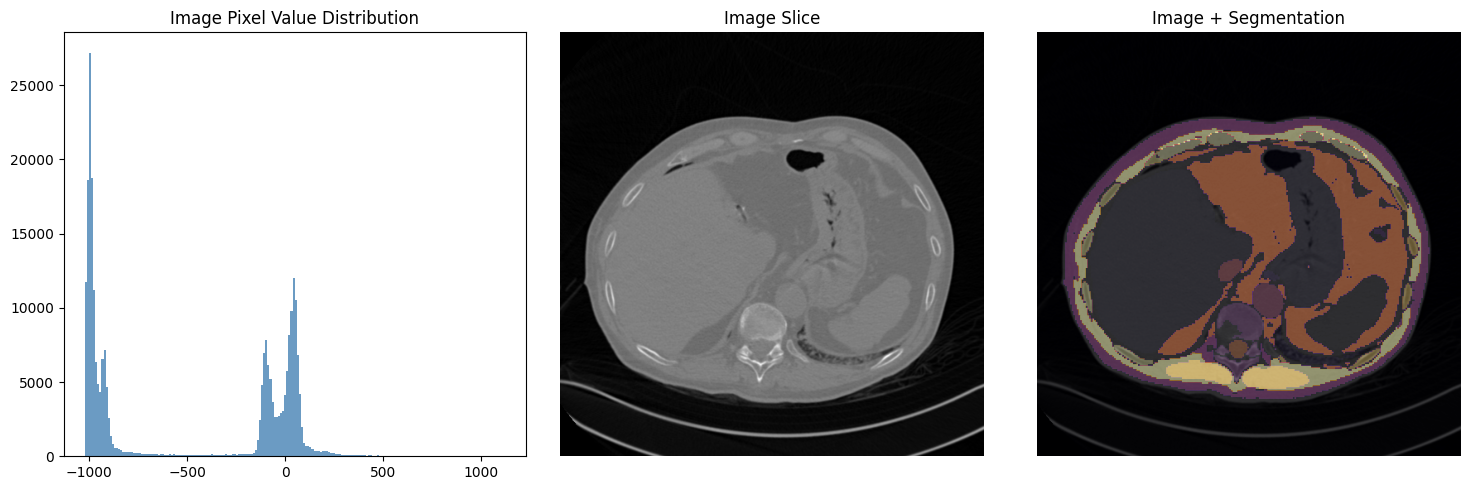

In [82]:
cmap = 'inferno'
sample_med_seg(dataset2_ct_list, dataset2_ct_seg_list, dataset2_ct_seg_tissue_list, volume_index=0, slice_index = 50, cmap=cmap)

show sample:  E:\Projects\yang_proj\data\anika\MR_registrated\moved_mr-volume-34438427_t1_vibe_in_tra - 5.nii.gz
Data distribution range: 0.0 1302.7838134765625
Shape: (512, 512, 63)
Voxel spacing: (0.73828125, 0.73828125, 1.5)
Affine matrix: [[-7.38281250e-01  0.00000000e+00  0.00000000e+00  2.05630859e+02]
 [ 0.00000000e+00 -7.38281250e-01  0.00000000e+00  3.51630859e+02]
 [ 0.00000000e+00  0.00000000e+00  1.50000000e+00 -1.25809998e+03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


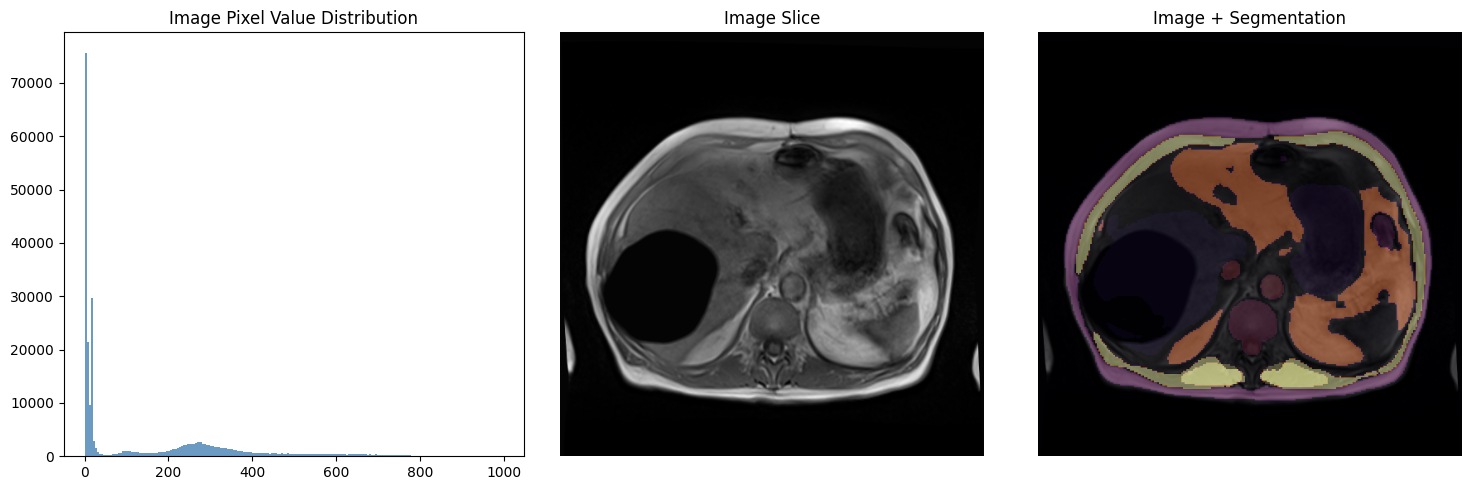

In [83]:
# vibe in sample
sample_med_seg(dataset2_mr_vibe_in_list, dataset2_mr_vibe_in_seg_list, dataset2_mr_vibe_in_seg_tissue_list, volume_index=0, slice_index = 50, cmap=cmap)

show sample:  E:\Projects\yang_proj\data\anika\MR_registrated\moved_mr-volume-34438427_t1_vibe_opp_tra - 5.nii.gz
Data distribution range: 0.0 1177.7640380859375
Shape: (512, 512, 63)
Voxel spacing: (0.73828125, 0.73828125, 1.5)
Affine matrix: [[-7.38281250e-01  0.00000000e+00  0.00000000e+00  2.05630859e+02]
 [ 0.00000000e+00 -7.38281250e-01  0.00000000e+00  3.51630859e+02]
 [ 0.00000000e+00  0.00000000e+00  1.50000000e+00 -1.25809998e+03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


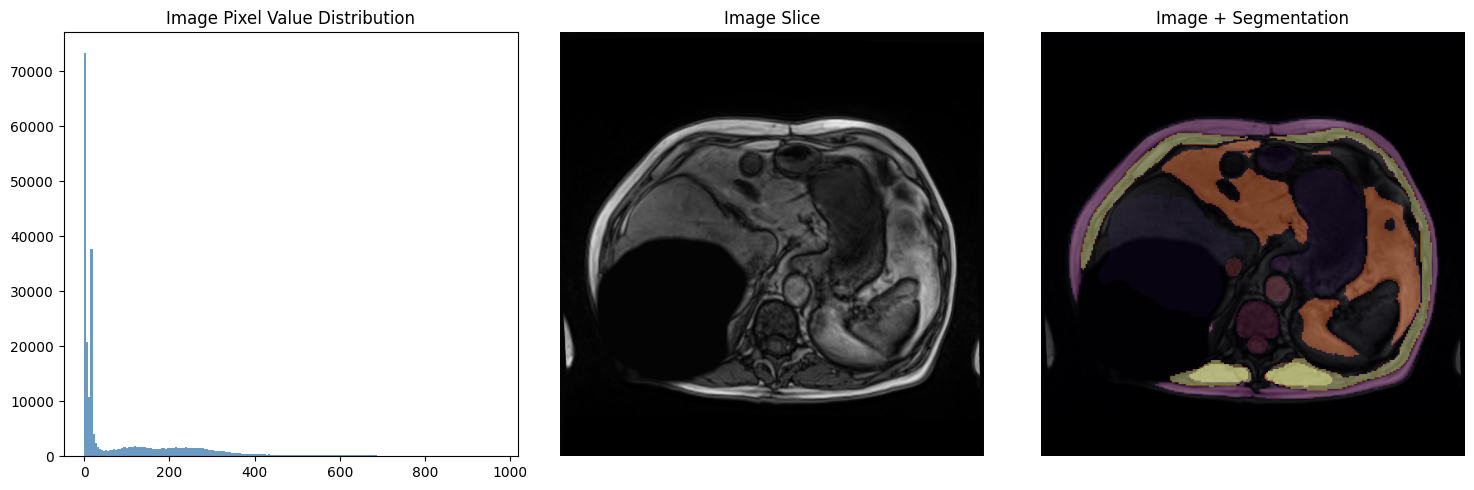

In [84]:
# vibe opp sample
sample_med_seg(dataset2_mr_vibe_opp_list, dataset2_mr_vibe_opp_seg_list, dataset2_mr_vibe_opp_seg_tissue_list, volume_index=0, slice_index = 50, cmap=cmap)

show sample:  E:\Projects\yang_proj\data\anika\MR_registrated\moved_mr-volume-41045510_t1_vibe_dixon_tra_in - 4.nii.gz
Data distribution range: 0.0 857.6268920898438
Shape: (512, 512, 99)
Voxel spacing: (0.9765625, 0.9765625, 1.5)
Affine matrix: [[ -0.9765625    0.           0.         249.51171875]
 [  0.          -0.9765625    0.         450.51171875]
 [  0.           0.           1.5        246.5       ]
 [  0.           0.           0.           1.        ]]


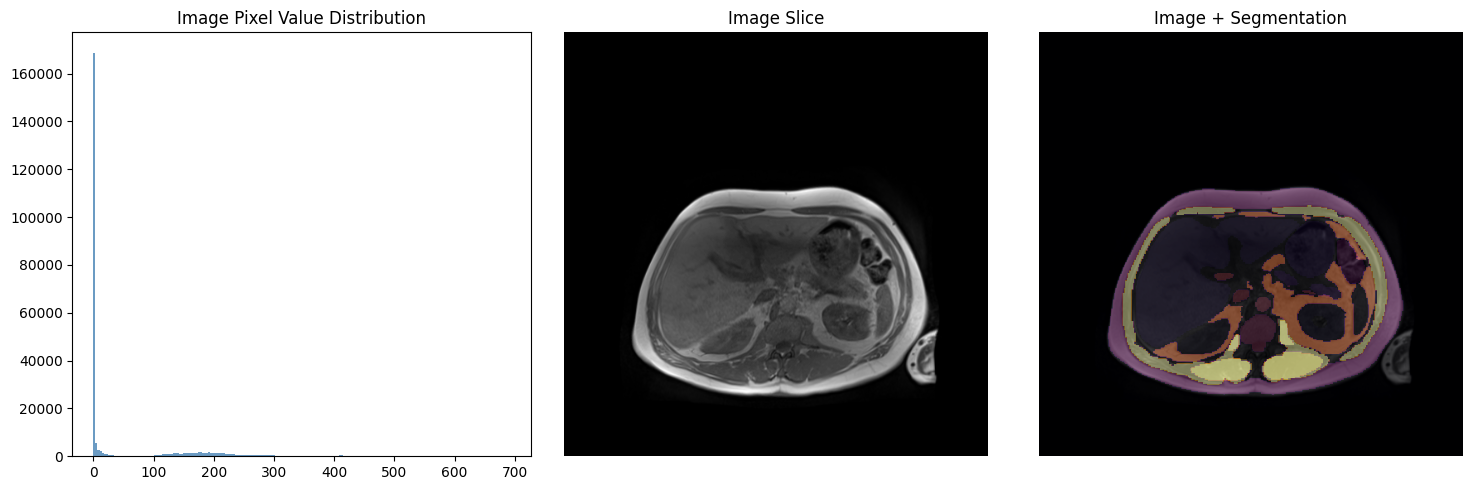

In [85]:
# vibe dixon sample
sample_med_seg(dataset2_mr_vibe_dixon_list, dataset2_mr_vibe_dixon_seg_list, dataset2_mr_vibe_dixon_seg_tissue_list, volume_index=0, slice_index = 50, cmap=cmap)

## UMM internal dataset (Dr. Anish Raj)

In [86]:
from dataprocesser.dataset_anish import list_img_seg_ad_pIDs_from_anish_csv
dataset3_patient_IDs, Aorta_diss, dataset3_segs, dataset3_images = list_img_seg_ad_pIDs_from_anish_csv('synthrad_conversion\datacsv\healthy_dissec_newserver_refined.csv')
dataset3_seg_tissues = [filename.replace(".nii", "_seg_tissue.nii") for filename in dataset3_images]
print(len(dataset3_images), len(dataset3_segs), len(dataset3_seg_tissues))


163 163 163


show sample:  E:\Projects\yang_proj\data\anish\ct-volume-301.nii
Data distribution range: -1024.0 1372.7626953125
Shape: (384, 320, 224)
Voxel spacing: (0.9, 0.9, 1.5)
Affine matrix: [[-8.99999976e-01  0.00000000e+00  0.00000000e+00  2.21966400e+02]
 [ 0.00000000e+00 -8.99999976e-01  0.00000000e+00  4.02833588e+02]
 [ 0.00000000e+00  0.00000000e+00  1.50000000e+00 -1.49009998e+03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


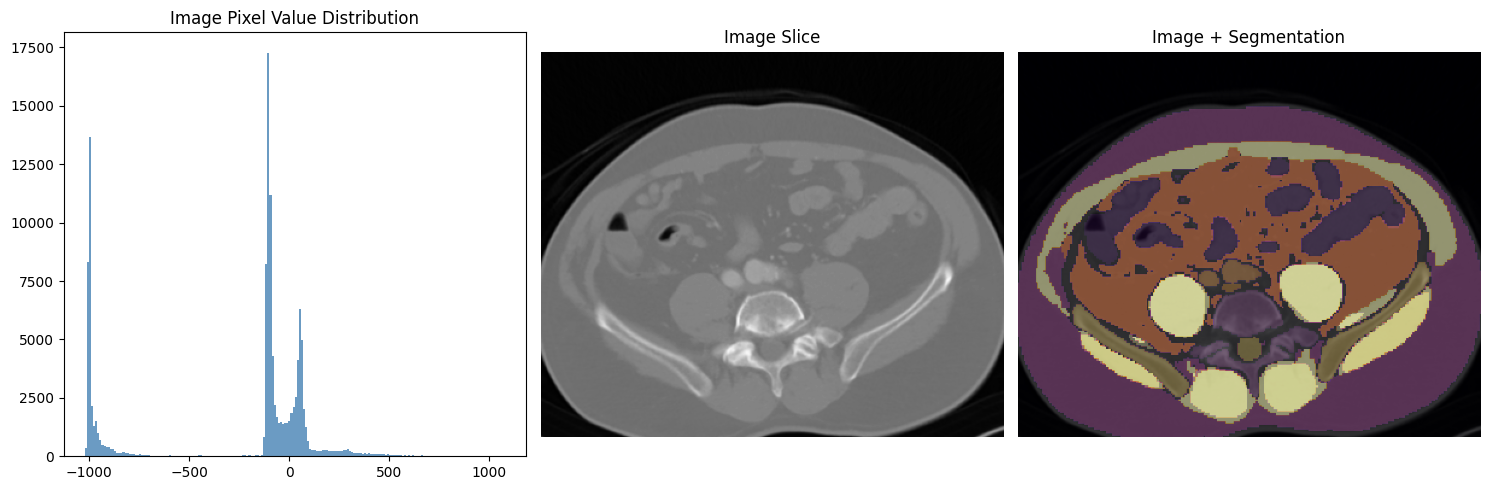

In [87]:
cmap = 'inferno'
sample_med_seg(dataset3_images, dataset3_segs, dataset3_seg_tissues, volume_index=0, slice_index = 50, cmap=cmap)

## UMM internal datset (Dr. Dominik Bauer)

In [9]:
from dataprocesser.dataset_dominik import all_list_from_dominik_dataset
mr_dir = 'E:\Projects\yang_proj\data\dominik\Dominik_MR_VIBE'
mr_list = all_list_from_dominik_dataset(mr_dir)
mr3_list = []
mr3_merged_seg_list = []
mr3_seg_list = []
mr3_seg_tissue_list = []
for item in mr_list:
    if item.endswith('merged_seg.nii'):
        mr3_merged_seg_list.append(item)
    elif item.endswith('seg.nii'):
        mr3_seg_list.append(item)
    elif item.endswith('seg_tissue.nii'):
        mr3_seg_tissue_list.append(item)
    else:
        mr3_list.append(item)
print(len(mr3_list), len(mr3_merged_seg_list), len(mr3_seg_list), len(mr3_seg_tissue_list))

24 24 24 24


show sample:  E:\Projects\yang_proj\data\dominik\Dominik_MR_VIBE\40213577.nii
Shape: (320, 220, 56)
Voxel spacing: (1.1875, 1.1875, 4.0)
Affine matrix: [[ -1.1875       0.           0.         181.96070862]
 [  0.          -1.1875       0.         157.47009277]
 [  0.           0.           4.         -40.12244034]
 [  0.           0.           0.           1.        ]]


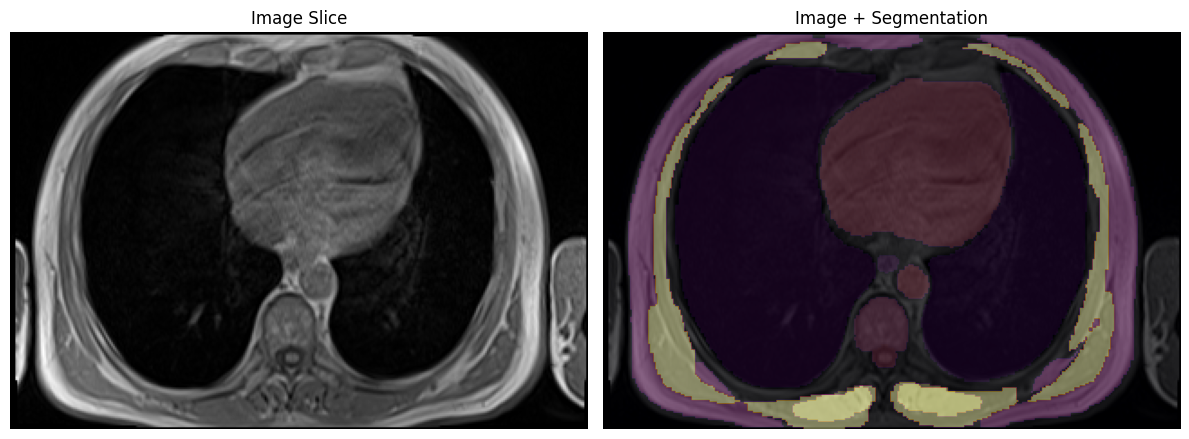

In [15]:
cmap = 'inferno'
sample_med_seg(mr3_list, mr3_seg_list, mr3_seg_tissue_list, volume_index=2, slice_index = 50, cmap=cmap)

## XCAT Dataset

In [16]:
from dataprocesser.dataset_xcat import list_img_pID_from_XCAT_folder
xcat_dir = r'E:\Projects\yang_proj\data\xcat'
images, patient_IDs = list_img_pID_from_XCAT_folder(xcat_dir)


Found 56 files in E:\Projects\yang_proj\data\xcat 



# create segmentations with the data list using totalsegmentator

here we use the new lits dataset as example

In [4]:
if_create_seg = False
if if_create_seg:
    # example to read and build a dataset list for creating dataset
    target_file_list = createseg.create_dataset_list(dataset = 'synthrad_mr')
    for item in target_file_list[:3]:
        print(f'{item} \n')

Found 30 mr files in E:\Projects\yang_proj\data\synthrad\Task1_val\pelvis 

E:\Projects\yang_proj\data\synthrad\Task1_val\pelvis\1PA002\mr.nii.gz 

E:\Projects\yang_proj\data\synthrad\Task1_val\pelvis\1PA008\mr.nii.gz 

E:\Projects\yang_proj\data\synthrad\Task1_val\pelvis\1PA017\mr.nii.gz 



in this way we can get the segmentation as filename_seg.nii.gz that we want

# create csv file as train/test set

we import the created datalist to a csv file, so that we can modify and reuse it later

we should get an example.csv with following content:

id,Aorta_diss,seg,img
1PA001,0,E:\Projects\yang_proj\data\synthrad\Task1\pelvis\1PA001\ct_seg.nii.gz,E:\Projects\yang_proj\data\synthrad\Task1\pelvis\1PA001\ct.nii.gz
1PA004,0,E:\Projects\yang_proj\data\synthrad\Task1\pelvis\1PA004\ct_seg.nii.gz,E:\Projects\yang_proj\data\synthrad\Task1\pelvis\1PA004\ct.nii.gz
1PA005,0,E:\Projects\yang_proj\data\synthrad\Task1\pelvis\1PA005\ct_seg.nii.gz,E:\Projects\yang_proj\data\synthrad\Task1\pelvis\1PA005\ct.nii.gz

In [89]:
from dataprocesser import dataset_synthrad
from dataprocesser import create_csv 
import csv
def create_csv_modality_info_file(dataset_list, output_mr_csv_file):
    with open(output_mr_csv_file, 'w', newline='') as f:
        csvwriter = csv.writer(f)
        csvwriter.writerow(['id', 'Aorta_diss', 'seg', 'seg_tissue' ,'img', 'modality'])
        csvwriter.writerows(dataset_list) 

def zip_to_csv_list(images, segs, seg_tissues, patient_IDs, Aorta_diss=None, modality = 0):  
    modality_list = [modality] * len(images)
    if Aorta_diss is None:
        Aorta_diss = [0] * len(images)
    datalist = [[id,Aorta_diss,seg,seg_tissue,image,modality] 
                            for id,Aorta_diss,seg,seg_tissue,image, modality in zip(patient_IDs, Aorta_diss, segs, seg_tissues, images, modality_list)]
    return datalist

# modality:
# ct=0, t1_echo_gradient=1, t1_vibe_in=2, t1_vibe_opp=3, t1_vibe_dixon=4
# dataset 1

'''datalist_synthrad_ct = zip_to_csv_list(synthrad_ct_images, synthrad_ct_segs, synthrad_ct_seg_tissues, synthrad_ct_patient_IDs, Aorta_diss=None, modality = 0)
datalist_synthrad_mr = zip_to_csv_list(synthrad_mr_images, synthrad_mr_segs, synthrad_mr_seg_tissues, synthrad_mr_patient_IDs, Aorta_diss=None, modality = 1)
datalist_dataset2_ct = zip_to_csv_list(dataset2_ct_list, dataset2_ct_seg_list, dataset2_ct_seg_tissue_list, dataset2_ct_pID_list, Aorta_diss=None, modality = 0)
datalist_dataset2_mr_vibe_in = zip_to_csv_list(dataset2_mr_vibe_in_list, dataset2_mr_vibe_in_seg_list, dataset2_mr_vibe_in_seg_tissue_list, dataset2_mr_vibe_in_pID_list, Aorta_diss=None, modality = 2)
datalist_dataset2_mr_vibe_opp = zip_to_csv_list(dataset2_mr_vibe_opp_list, dataset2_mr_vibe_opp_seg_list, dataset2_mr_vibe_opp_seg_tissue_list, dataset2_mr_vibe_opp_pID_list, Aorta_diss=None, modality = 3)
datalist_dataset2_mr_vibe_dixon = zip_to_csv_list(dataset2_mr_vibe_dixon_list, dataset2_mr_vibe_dixon_seg_list, dataset2_mr_vibe_dixon_seg_tissue_list, dataset2_mr_vibe_dixon_pID_list, Aorta_diss=None, modality = 4)
datalist_dataset3_ct = zip_to_csv_list(dataset3_images, dataset3_segs, dataset3_seg_tissues, dataset3_patient_IDs, Aorta_diss=None, modality = 0)

datalist_all_datasets = datalist_synthrad_ct + datalist_synthrad_mr + datalist_dataset2_ct + datalist_dataset2_mr_vibe_in + datalist_dataset2_mr_vibe_opp +datalist_dataset2_mr_vibe_dixon + datalist_dataset3_ct
output_csv_file = 'tutorial_all_datasets.csv'
create_csv_modality_info_file(datalist_all_datasets, output_csv_file)'''

# 所有数据源封装成配置列表
dataset_configs = [
    {'name': 'synthrad_ct', 'images': synthrad_ct_images, 'segs': synthrad_ct_segs, 'seg_tissues': synthrad_ct_seg_tissues, 'pIDs': synthrad_ct_patient_IDs, 'modality': 0},
    {'name': 'synthrad_mr_T1', 'images': synthrad_T1_mr_images, 'segs': synthrad_T1_mr_segs, 'seg_tissues': synthrad_T1_mr_seg_tissues, 'pIDs': synthrad_T1_mr_patient_IDs, 'modality': 1},
    {'name': 'synthrad_mr_T2', 'images': synthrad_T2_mr_images, 'segs': synthrad_T2_mr_segs, 'seg_tissues': synthrad_T2_mr_seg_tissues, 'pIDs': synthrad_T2_mr_patient_IDs, 'modality': 2},
    {'name': 'dataset2_ct', 'images': dataset2_ct_list, 'segs': dataset2_ct_seg_list, 'seg_tissues': dataset2_ct_seg_tissue_list, 'pIDs': dataset2_ct_pID_list, 'modality': 0},
    {'name': 'dataset2_mr_vibe_in', 'images': dataset2_mr_vibe_in_list, 'segs': dataset2_mr_vibe_in_seg_list, 'seg_tissues': dataset2_mr_vibe_in_seg_tissue_list, 'pIDs': dataset2_mr_vibe_in_pID_list, 'modality': 3},
    {'name': 'dataset2_mr_vibe_opp', 'images': dataset2_mr_vibe_opp_list, 'segs': dataset2_mr_vibe_opp_seg_list, 'seg_tissues': dataset2_mr_vibe_opp_seg_tissue_list, 'pIDs': dataset2_mr_vibe_opp_pID_list, 'modality': 4},
    {'name': 'dataset2_mr_vibe_dixon', 'images': dataset2_mr_vibe_dixon_list, 'segs': dataset2_mr_vibe_dixon_seg_list, 'seg_tissues': dataset2_mr_vibe_dixon_seg_tissue_list, 'pIDs': dataset2_mr_vibe_dixon_pID_list, 'modality': 5},
    {'name': 'dataset3_ct', 'images': dataset3_images, 'segs': dataset3_segs, 'seg_tissues': dataset3_seg_tissues, 'pIDs': dataset3_patient_IDs, 'modality': 0},
]

# 自动构造 datalist，并可单独访问每个
datalist_dict = {}
for config in dataset_configs:
    datalist_dict[config['name']] = zip_to_csv_list(
        config['images'],
        config['segs'],
        config['seg_tissues'],
        config['pIDs'],
        Aorta_diss=None,
        modality=config['modality']
    )

# 合并所有 datalist
datalist_all_datasets = []
for datalist in datalist_dict.values():
    datalist_all_datasets.extend(datalist)


In [92]:
import random

def split_datalist(datalist, train_ratio=0.8, seed=42):
    """
    将 datalist 按照指定比例划分为训练集和测试集。
    """
    random.seed(seed)
    random.shuffle(datalist)
    split_idx = int(len(datalist) * train_ratio)
    train_set = datalist[:split_idx]
    test_set = datalist[split_idx:]
    return train_set, test_set

def count_unique_patients(datalist):
    """
    统计 datalist 中唯一患者的数量。
    """
    patient_ids = datalist # set([entry[0] for entry in datalist])  # 假设 patient ID 是列表的第一个元素
    return len(patient_ids)

# 对每个数据列表进行划分
'''train_synthrad_ct, test_synthrad_ct = split_datalist(datalist_synthrad_ct)
train_synthrad_mr, test_synthrad_mr = split_datalist(datalist_synthrad_mr)
train_dataset2_ct, test_dataset2_ct = split_datalist(datalist_dataset2_ct)
train_dataset2_mr_vibe_in, test_dataset2_mr_vibe_in = split_datalist(datalist_dataset2_mr_vibe_in)
train_dataset2_mr_vibe_opp, test_dataset2_mr_vibe_opp = split_datalist(datalist_dataset2_mr_vibe_opp)
train_dataset2_mr_vibe_dixon, test_dataset2_mr_vibe_dixon = split_datalist(datalist_dataset2_mr_vibe_dixon)
train_dataset3_ct, test_dataset3_ct = split_datalist(datalist_dataset3_ct)


# 合并所有训练集和测试集
train_all = (train_synthrad_ct + train_synthrad_mr + train_dataset2_ct +
             train_dataset2_mr_vibe_in + train_dataset2_mr_vibe_opp +
             train_dataset2_mr_vibe_dixon + train_dataset3_ct)

test_all = (test_synthrad_ct + test_synthrad_mr + test_dataset2_ct +
            test_dataset2_mr_vibe_in + test_dataset2_mr_vibe_opp +
            test_dataset2_mr_vibe_dixon + test_dataset3_ct)
'''
train_sets = {}
test_sets = {}

for name, datalist in datalist_dict.items():
    train_sets[name], test_sets[name] = split_datalist(datalist)
train_all = sum(train_sets.values(), [])
test_all = sum(test_sets.values(), [])

train_output_csv_file = 'tutorial_train.csv'
create_csv_modality_info_file(train_all, train_output_csv_file)

test_output_csv_file = 'tutorial_test.csv'
create_csv_modality_info_file(test_all, test_output_csv_file)

def count_unique_patients_dict(datalist):
    return len(set(entry[0] for entry in datalist))  # 假设 patient ID 是 entry[0]

print("训练集/测试集患者数量：")
for name in train_sets:
    print(f"{name} - train: {count_unique_patients_dict(train_sets[name])}, test: {count_unique_patients_dict(test_sets[name])}")

"""print("Patient Count")
print(f"SynthRad CT - train set: {count_unique_patients(train_synthrad_ct)}, test set: {count_unique_patients(test_synthrad_ct)}")
print(f"SynthRad MR - train set: {count_unique_patients(train_synthrad_mr)}, test set: {count_unique_patients(test_synthrad_mr)}")
print(f"Dataset2 CT - train set: {count_unique_patients(train_dataset2_ct)}, test set: {count_unique_patients(test_dataset2_ct)}")
print(f"Dataset2 MR VIBE IN - train setin set: {count_unique_patients(train_dataset2_mr_vibe_in)}, test set: {count_unique_patients(test_dataset2_mr_vibe_in)}")
print(f"Dataset2 MR VIBE OPP - train set: {count_unique_patients(train_dataset2_mr_vibe_opp)}, test set: {count_unique_patients(test_dataset2_mr_vibe_opp)}")
print(f"Dataset2 MR VIBE DIXON - train set: {count_unique_patients(train_dataset2_mr_vibe_dixon)}, test set: {count_unique_patients(test_dataset2_mr_vibe_dixon)}")
print(f"Dataset3 CT - train set: {count_unique_patients(train_dataset3_ct)}, test set: {count_unique_patients(test_dataset3_ct)}")

print("------------------")
print("all patients")
print(f"all patients for training: {count_unique_patients(train_all)}")
print(f"all patients for test: {count_unique_patients(test_all)}")
"""


训练集/测试集患者数量：
synthrad_ct - train: 144, test: 36
synthrad_mr_T1 - train: 96, test: 24
synthrad_mr_T2 - train: 48, test: 12
dataset2_ct - train: 38, test: 10
dataset2_mr_vibe_in - train: 25, test: 9
dataset2_mr_vibe_opp - train: 25, test: 9
dataset2_mr_vibe_dixon - train: 7, test: 2
dataset3_ct - train: 130, test: 33


'print("Patient Count")\nprint(f"SynthRad CT - train set: {count_unique_patients(train_synthrad_ct)}, test set: {count_unique_patients(test_synthrad_ct)}")\nprint(f"SynthRad MR - train set: {count_unique_patients(train_synthrad_mr)}, test set: {count_unique_patients(test_synthrad_mr)}")\nprint(f"Dataset2 CT - train set: {count_unique_patients(train_dataset2_ct)}, test set: {count_unique_patients(test_dataset2_ct)}")\nprint(f"Dataset2 MR VIBE IN - train setin set: {count_unique_patients(train_dataset2_mr_vibe_in)}, test set: {count_unique_patients(test_dataset2_mr_vibe_in)}")\nprint(f"Dataset2 MR VIBE OPP - train set: {count_unique_patients(train_dataset2_mr_vibe_opp)}, test set: {count_unique_patients(test_dataset2_mr_vibe_opp)}")\nprint(f"Dataset2 MR VIBE DIXON - train set: {count_unique_patients(train_dataset2_mr_vibe_dixon)}, test set: {count_unique_patients(test_dataset2_mr_vibe_dixon)}")\nprint(f"Dataset3 CT - train set: {count_unique_patients(train_dataset3_ct)}, test set: {count

# start preparation for training or inference

## create a monai/torch dataloader

this dataloader uses add_CreateContour_MergeMask_MaskHUAssign_transforms, which assigns values to segmentation classes

In [ ]:
from synthrad_conversion.utils.my_configs_yacs import init_cfg
from dataprocesser.step1_init_data_list import init_dataset
config_path = 'tutorial_config.yaml'
opt=init_cfg(config_path)
model_name_path='Infer_'+opt.model_name + opt.name_prefix
print(model_name_path)
dataset_name = 'combined_simplified_csv_seg_assigned'
loader, opt, my_paths = init_dataset(opt, model_name_path, dataset_name)
train_loader = loader.train_loader
val_loader  = loader.val_loader
first_batch = next(iter(val_loader))
first_input = first_batch[opt.dataset.indicator_A]
first_target = first_batch[opt.dataset.indicator_B]
print("original image shape:", first_target.shape)


In [ ]:
# visualize a slice:
import matplotlib.pyplot as plt
def plottorchdata(data, i, slice_id):
    data = data.cpu().numpy().squeeze().squeeze()
    dataimg = f'tutorial_{i}.png'
    plt.figure(i)
    plt.imshow(data[..., slice_id], cmap='gray')
    plt.savefig(dataimg)
slice_id = 50
plottorchdata(first_input, 0, slice_id)
plottorchdata(first_target, 1, slice_id)

# run inference!

In [ ]:
device = torch.device(f'cuda:0' if torch.cuda.is_available() else 'cpu') # 0=TitanXP, 1=P5000
print('use GPU: ', torch.cuda.get_device_name(device))

In [ ]:
from synthrad_conversion.networks.ddpm.ddpm_mri2ct import DiffusionModel
train_patient_IDs=loader.train_patient_IDs
test_patient_IDs=loader.test_patient_IDs
mode = "test"
Diffuser=DiffusionModel(opt,my_paths, 
                train_loader=train_loader,
                    val_loader=val_loader, 
                    train_patient_IDs=train_patient_IDs,
                    test_patient_IDs=test_patient_IDs)
if mode == "train":
    Diffuser.train()
elif mode == "test":
    Diffuser.val()

# convert all generated slices to volume

In [ ]:
def rename(folder_path):
    ## rename file as the format pID_type_sliceID
    # 1 delete the prefix, prefix: ct, ct_seg, ct_volume
    for filename in os.listdir(folder_path):
        old_file_path = os.path.join(folder_path, filename)
        parts = filename.split('_')
        if len(parts)>=3:
            patient_ID = parts[0]
            sign_name = parts[-2]
            slice_ID = parts[-1]

            if sign_name == 'seg':
                new_filename = f'{patient_ID}_seg_{slice_ID}'
            elif sign_name == 'input':
                new_filename = f'{patient_ID}_seg_{slice_ID}'
            elif sign_name == 'target':
                new_filename = f'{patient_ID}_target_{slice_ID}'
            else: # for synthesized and mask
                new_filename = f'{patient_ID}_{sign_name}_{slice_ID}'
            if not new_filename.endswith('.nii.gz'):
                new_filename += '.nii.gz'
            new_file_path = os.path.join(folder_path, new_filename)
            os.rename(old_file_path, new_file_path)
            print(f'Renamed {old_file_path} to {new_file_path}')

In [ ]:
from seg2med_evaluation import stack_volume_synthrad_anish 
import importlib
importlib.reload(stack_volume_synthrad_anish)  # 强制重新加载模块
root_path = r'logs'
folder_list = [
        '20250403_0359_Infer_ddpm2d_seg2med',
                ]
for folder in folder_list:
    folder_path = os.path.join(root_path, folder, 'saved_outputs')
    # rename(folder_path)
    stack_volume_synthrad_anish.stack_volume(folder_path)